**Problem Statement**

A company that wants to test two versions of a “Buy Now” button on their website:

*   Version A (Control): Blue button.
*   Version B (Test): Red button.

The goal is to see which button gets more clicks (i.e., a higher click-through rate).

**A brief summary of A/B testing steps:**


1.   **Define the Goal**: What metric are you trying to improve? (in our case, Click-Through Rate).
2.   **Create Variants**: Design Version A (Control) and Version B (Test).
3. **Randomly Split Users:** Show Version A to half of the users and Version B to the other half.
4. **Collect Data:** Track user interactions (clicks, purchases, etc.).
5. **Analyze Results:** Compare metrics (e.g., average click rates).

      - Perform a statistical test (like a t-test or chi-square test) to check
        if the difference is significant.

6. **Decide & Implement:** If Version B performs better, implement it. Otherwise, stick with Version A.




**1. Setting Up the Experiment**

In [1]:
import numpy as np

In [2]:
# Setting a random seed for reproducibility
np.random.seed(42)

In [3]:
# Number of users who saw each version
num_users_A = 1000  # Blue button (Control)
num_users_B = 1000  # Red button (Test)


In [4]:
# Simulating clicks (1 = Clicked, 0 = Not Clicked)
clicks_A = np.random.binomial(1, 0.10, num_users_A)  # 10% click rate
clicks_B = np.random.binomial(1, 0.12, num_users_B)  # 12% click rate

In [5]:
# Checking how many people clicked each button
total_clicks_A = np.sum(clicks_A)
total_clicks_B = np.sum(clicks_B)

In [6]:
print(f"Total Clicks for Blue Button (A): {total_clicks_A}")
print(f"Total Clicks for Red Button (B): {total_clicks_B}")

Total Clicks for Blue Button (A): 100
Total Clicks for Red Button (B): 112


Seeing this number, we may immediately conclude that the company should change their BUY NOW button to color red but that is not how it works in A/B testing.

We need to proceed with statistics after this to understand if the difference is significant enough (significance level) to warrant the company changing the color.

**2. Analyzing the Results**

In [14]:
# Calculating click-through rates
click_rate_A = total_clicks_A / num_users_A
click_rate_B = total_clicks_B / num_users_B

print(f"Click-Through Rate of Blue Button (A): {click_rate_A:.2%}")
print(f"Click-Through Rate of Red Button (B): {click_rate_B:.2%}")


Click-Through Rate of Blue Button (A): 10.00%
Click-Through Rate of Red Button (B): 11.20%


**3. Performing a Statistical Test (T-Test)**

In [7]:
from scipy import stats

In [8]:
# Performing a t-test
t_stat, p_value = stats.ttest_ind(clicks_A, clicks_B)

In [9]:
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: -0.8714
P-value: 0.3836


In [11]:
# Checking significance
alpha = 0.05  # Common significance level (5%)
if p_value < alpha:
    print("The difference is statistically significant. The Red button is better!")
else:
    print("No significant difference. Stick with the Blue button.")

No significant difference. Stick with the Blue button.


**4. Visualizing the Results**

In [12]:
import matplotlib.pyplot as plt

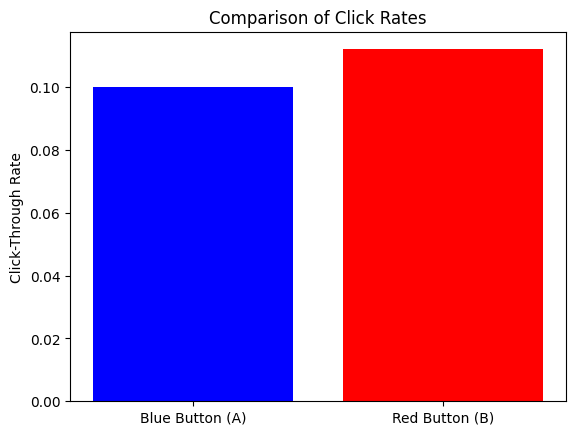

In [15]:
# Plotting the click rates
labels = ['Blue Button (A)', 'Red Button (B)']
click_rates = [click_rate_A, click_rate_B]

plt.bar(labels, click_rates, color=['blue', 'red'])
plt.title('Comparison of Click Rates')
plt.ylabel('Click-Through Rate');

**5. Making a Decision**

The p-value is greater than 0.05, the difference is likely due to random chance, so the Blue button should stay.

**What is p-value?**

A p-value is a number that helps us decide if the difference between two groups is real or just a coincidence (random chance).

In our case, we wanted to prove that the difference between the 100 people that clicked button A and 120 that clicked button B were not just a coincidence. The fact is that, we could have had more people click red because by chance, the people we selected just love the color red generally. If we had made the red button green, it may have had less clicks. So, to eliminate these doubts, we have to use p-value to really establish our point.

**How Small is Small? (Significance Level)**

The usual threshold is 0.05 (or 5%).

If the p-value < 0.05, the result is considered statistically significant (not due to chance).

If the p-value ≥ 0.05, the result is considered not significant (could be due to chance).

**In our case:**

We tested Blue vs. Red buttons and got a p-value of 0.3836.

This means there’s a 38% chance that the difference we saw is just luck.

Since 0.3836 > 0.05, we consider this difference to be luck/chance.

If the p-value was 0.02,

This means there’s an 2% chance that the difference to be real and significant. Meaning that more people clicking on the red button was not by mere chance. That is, the probability that we had more red clicks by chance is very low.

So, the lower your p-value is to the threshold (0.05), the better you can confidently establish that your results are real and not mere luck.

From our result, we will not reject the null hypothesis (fail to reject the null hypothesis).

In other words, the Red button is not necessarily better. Stick with the Blue button.
